<a href="https://colab.research.google.com/github/revista1919/Revista-Nacional-de-las-Ciencias-para-Estudiantes/blob/main/Simulaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-4007162573.py:62: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  r = odeint(ODE_galaxy_motion, R0, t)


Starting angle (deg): 14.0


/tmp/ipython-input-4007162573.py:66: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  r = odeint(ODE_double_galaxy, r0, t, args=(R, t_array))


Computing time = 174.7 s


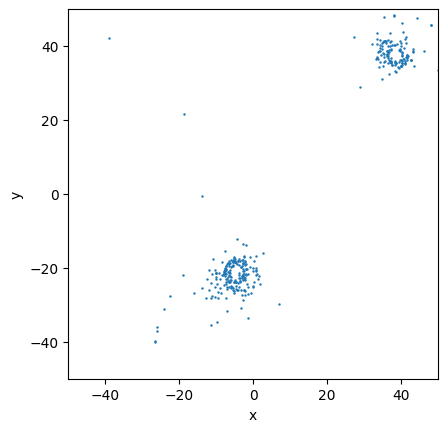

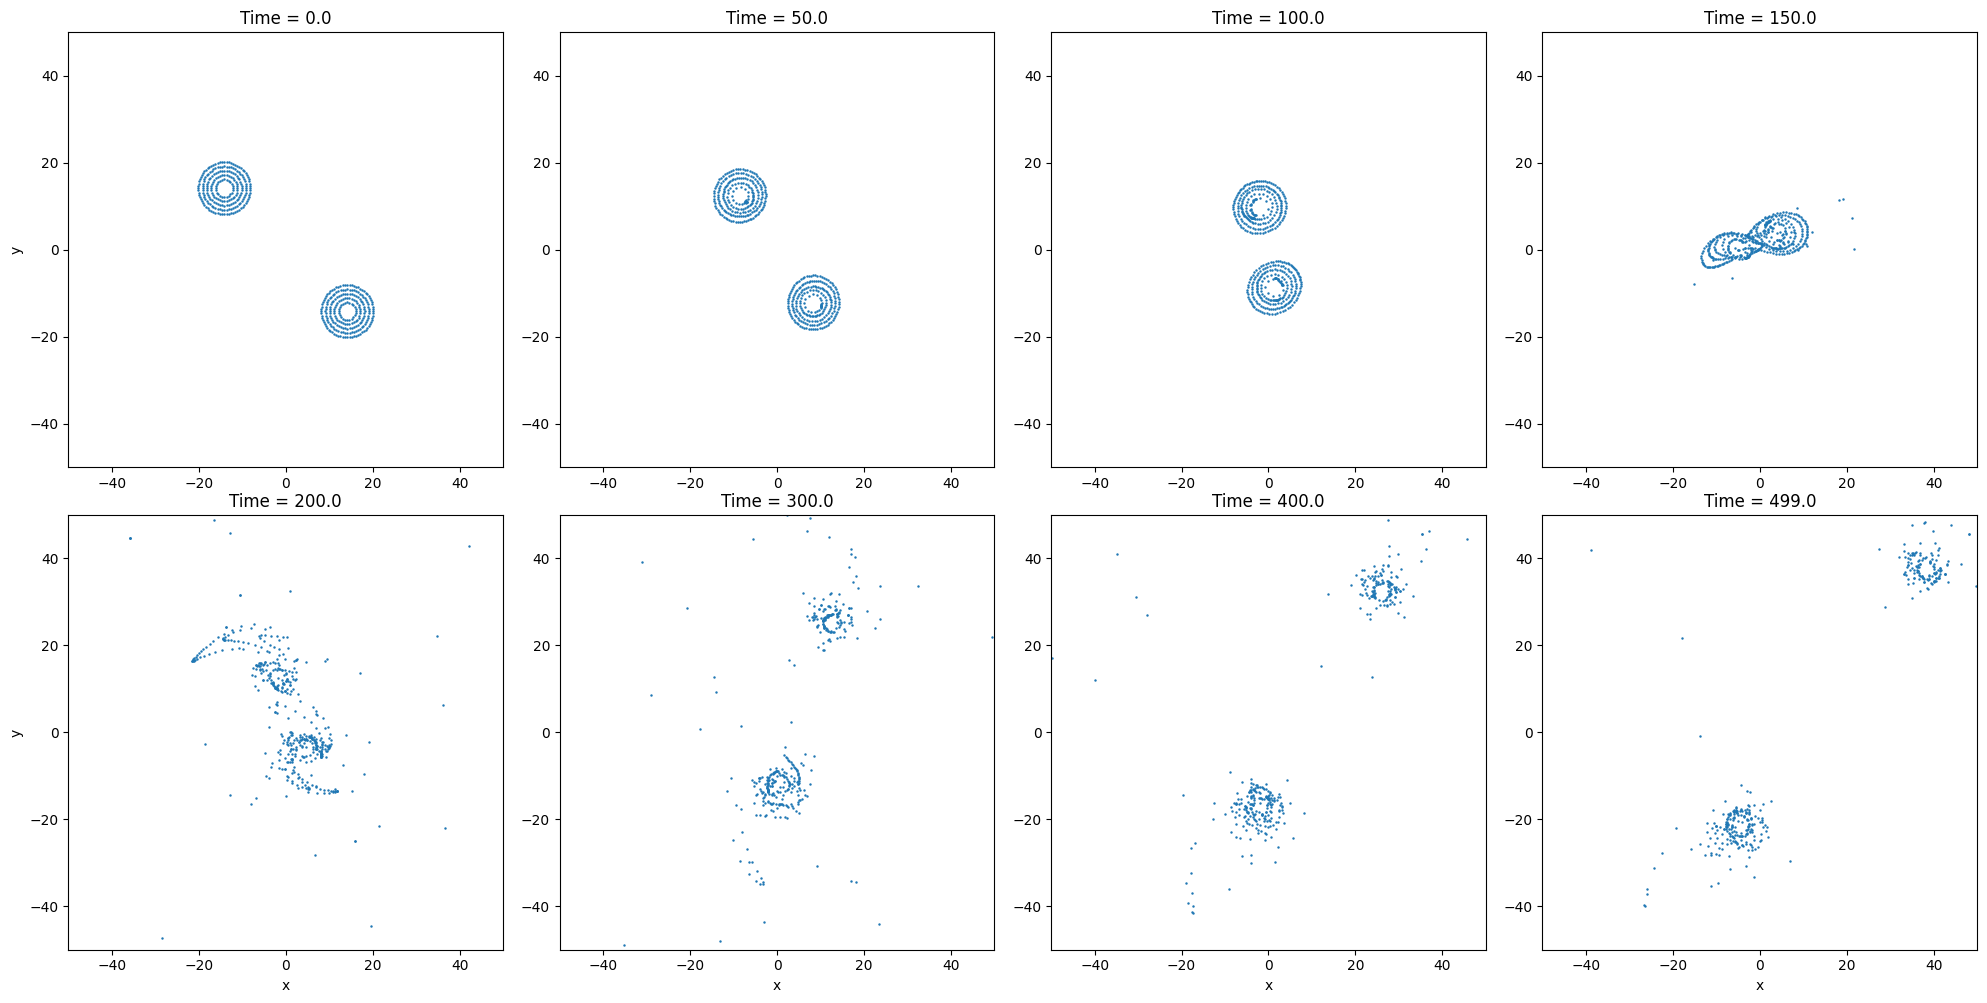

In [ ]:
# -- coding: utf-8 --
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from numpy import cos, sin, pi, sqrt
from scipy.integrate import odeint
from scipy.special import erf
import time
import datetime
import os

# Parametros Fisicos
G = 0.2  # Constante de Gravitacion Universal
M = 4  # Masa de una Galaxia solitaria
M1 = 3.5  # Masa1 de sistema de Galaxias
M2 = 2  # Masa2 de sistema de Galaxias
# = REQUISITO =#
clockwise = True  # True -> las galaxias rotan en sentido horario, False -> lo contrario

# Parametros de Animacion y Ploteo
xy_max = 50  # rango del ploting
N = 500  # Numero de pasos de tiempo para integrar
animation_length = 10  # Duracion del video en segundos, escala N para que la animacion sea asi de larga
t_max = 500
t_selection = [0, 50, 100, 150, 200, 300, 400, 499]  # Tiempos en las que desea trazar (debe ser un numero entero y < t_max)
current_directory = os.getcwd()
figure_directory = os.path.join(current_directory, 'Figures/')
movie_directory = os.path.join(current_directory, 'Movies/')
if not os.path.exists(figure_directory):
    os.mkdir(figure_directory)
if not os.path.exists(movie_directory):
    os.mkdir(movie_directory)
plotfigures = True
savemovie = True

def ODE_single_galaxy(r, t):
    return [r[2], r[3], -G * M * r[0] / (r[0]**2 + r[1]**2)**(3/2), -G * M * r[1] / (r[0]**2 + r[1]**2)**(3/2)]

def ODE_galaxy_motion(R, t):
    x, y = R[0] - R[4], R[1] - R[5]
    return [R[2], R[3], -G * M2 * x / (x**2 + y**2)**(3/2),
            -G * M2 * y / (x**2 + y**2)**(3/2), R[6], R[7],
            G * M1 * x / (x**2 + y**2)**(3/2),
            G * M1 * y / (x**2 + y**2)**(3/2)]

def ODE_double_galaxy(r, t, R, t_array):
    index = np.searchsorted(t_array, t)
    cgp = []  # Posicion actual de la galaxia
    for i in range(4):
        cgp.append(R[i][index - 1])
    x1, y1, x2, y2 = r[0] - cgp[0], r[1] - cgp[1], r[0] - cgp[2], r[1] - cgp[3]
    return [r[2], r[3],
            -G * M1 * x1 / (x1**2 + y1**2)**(3/2) + -G * M2 * x2 / (x2**2 + y2**2)**(3/2),
            -G * M1 * y1 / (x1**2 + y1**2)**(3/2) + -G * M2 * y2 / (x2**2 + y2**2)**(3/2)]

def integrate_single_galaxy(t, r0):
    r = odeint(ODE_single_galaxy, r0, t)
    return r[:, 0], r[:, 1]

def integrate_galaxy_motion(t, R0):
    r = odeint(ODE_galaxy_motion, R0, t)
    return r[:, 0], r[:, 1], r[:, 4], r[:, 5]

def integrate_double_galaxy(t, r0, R, t_array):
    r = odeint(ODE_double_galaxy, r0, t, args=(R, t_array))
    return r[:, 0], r[:, 1]

def SIV_single_galaxy_ring(r, n):
    r0 = []
    for j in range(len(n)):
        for i in range(n[j]):
            r0.append([r[j] * cos(i * 2 * pi / n[j]), r[j] * sin(i * 2 * pi / n[j]),
                       sqrt(G * M / r[j]) * sin(i * 2 * pi / n[j]),
                       -sqrt(G * M / r[j]) * cos(i * 2 * pi / n[j])])
    return r0

def SIV_single_galaxy_random(n, max_r):
    r0 = []
    for i in range(n):
        R = max_r * rand.random()
        theta = 2 * pi * rand.random()
        v = sqrt(G * M / R) + 0.1 * rand.uniform(-1, 1) * sqrt(G * M / R)
        delta = rand.uniform(-pi / 6, pi / 6)
        r0.append([R * cos(theta), R * sin(theta), v * sin(theta + delta), -v * cos(theta + delta)])
    return r0

def SIV_double_galaxy_ring(r, n, R0):
    k = (1 if clockwise == True else -1)
    r0 = []
    for j in range(len(n)):
        for i in range(n[j]):
            r0.append([r[j] * cos(i * 2 * pi / n[j]) + R0[0], r[j] * sin(i * 2 * pi / n[j]) + R0[1],
                       k * sqrt(G * M1 / r[j]) * sin(i * 2 * pi / n[j]) + R0[2],
                       -k * sqrt(G * M1 / r[j]) * cos(i * 2 * pi / n[j]) + R0[3]])
    for j in range(len(n)):
        for i in range(n[j]):
            r0.append([r[j] * cos(i * 2 * pi / n[j]) + R0[4], r[j] * sin(i * 2 * pi / n[j]) + R0[5],
                       k * sqrt(G * M2 / r[j]) * sin(i * 2 * pi / n[j]) + R0[6],
                       -k * sqrt(G * M2 / r[j]) * cos(i * 2 * pi / n[j]) + R0[7]])
    return r0

def SIV_galaxy_motion(s_init, s_closest):
    h = s_init / (2 * sqrt(2))
    theta = theta_for_closest_approach(s_init, s_closest)
    print("Starting angle (deg): %.1f" % (theta * 180 / pi))
    EffMass = 2 * M1 * M2 / (M1 + M2)
    v = sqrt(G * EffMass / (h * 2 * sqrt(2)))
    return [-h, h, v * cos(theta), -v * sin(theta), h, -h, -v * cos(theta), v * sin(theta)]

def GetData_single_galaxy(r0):
    t = np.linspace(0, t_max, N)
    x, y = integrate_single_galaxy(t, r0[0])
    for i in range(len(r0) - 1):
        datax, datay = integrate_single_galaxy(t, r0[i + 1])
        x = np.column_stack((x, datax))
        y = np.column_stack((y, datay))
        print("%.1f %%" % (100 * i / len(r0)), end="\r")
    return x, y

def GetData_galaxy_motion(r0):
    t = np.linspace(0, t_max, N)
    x1, y1, x2, y2 = integrate_galaxy_motion(t, r0)
    return x1, y1, x2, y2

def GetData_double_galaxy(r0, R_galaxies):
    t = np.linspace(0, t_max, N)
    x, y = integrate_double_galaxy(t, r0[0], R_galaxies, t)
    for i in range(len(r0) - 1):
        datax, datay = integrate_double_galaxy(t, r0[i + 1], R_galaxies, t)
        x = np.column_stack((x, datax))
        y = np.column_stack((y, datay))
        print("%.1f %%" % (100 * i / len(r0)), end="\r")
    return x, y

def animation_single_galaxy_ring(Radii, Numbers):
    R0 = SIV_single_galaxy_ring(Radii, Numbers)
    datax, datay = GetData_single_galaxy(R0)
    animate(datax, datay)
    plot_figures(datax, datay)
    return

def animation_single_galaxy_random(r_max, n_total):
    R0 = SIV_single_galaxy_random(n_total, r_max)
    datax, datay = GetData_single_galaxy(R0)
    animate(datax, datay)
    plot_figures(datax, datay)
    return

def animation_galaxy_motion(s_init, s_closest):
    R0 = SIV_galaxy_motion(s_init, s_closest)
    R_galaxies = GetData_galaxy_motion(R0)
    datax = np.column_stack((R_galaxies[0], R_galaxies[2]))
    datay = np.column_stack((R_galaxies[1], R_galaxies[3]))
    animate(datax, datay)
    plot_figures(datax, datay)
    return

def animation_double_galaxy(Radii, Numbers, s_init, s_closest):
    R0_galaxies = SIV_galaxy_motion(s_init, s_closest)
    R_galaxies = GetData_galaxy_motion(R0_galaxies)
    R0_stars = SIV_double_galaxy_ring(Radii, Numbers, R0_galaxies)
    datax, datay = GetData_double_galaxy(R0_stars, R_galaxies)
    animate(datax, datay)
    plot_figures(datax, datay)
    return

# OTHER FUNCTIONS
def theta_for_closest_approach(s_init, s_closest):
    Theta = [pi * i / 180 for i in range(46)]
    h = s_init / (2 * sqrt(2))
    S = []
    for theta in Theta:
        EffMass = 2 * M1 * M2 / (M1 + M2)
        initial_galaxy_data = [-h, h, sqrt(G * EffMass / (h * 2 * sqrt(2))) * cos(theta),
                               -sqrt(G * EffMass / (h * 2 * sqrt(2))) * sin(theta),
                               h, -h, -sqrt(G * EffMass / (h * 2 * sqrt(2))) * cos(theta),
                               sqrt(G * EffMass / (h * 2 * sqrt(2))) * sin(theta)]
        R_gal = GetData_galaxy_motion(initial_galaxy_data)
        galaxy_separation = sqrt((R_gal[0] - R_gal[2])**2 + (R_gal[1] - R_gal[3])**2)
        S.append(abs(s_closest - np.min(galaxy_separation)))
    i = S.index(min(S))
    return pi * i / 180

def update_func(num, datax, datay, line):
    line.set_data(datax[num, :], datay[num, :])
    return line,

def animate(datax, datay):
    fig1 = plt.figure()
    line, = plt.plot([], [], ".", markersize=1.5)
    plt.xlim(-xy_max, xy_max)
    plt.ylim(-xy_max, xy_max)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.gca().set_aspect('equal')
    anim = animation.FuncAnimation(fig1, update_func, datax.shape[0], fargs=(datax, datay, line),
                                   interval=1000 * animation_length / N, blit=True)
    print("Computing time = %.1f s" % (time.time() - T0))
    if savemovie:
        anim.save(movie_directory + '%s.mp4' % datetime.datetime.now().strftime("%I%M%p%B%d"))
    plt.show()

def plot_figures(datax, datay):
    if plotfigures:
        fig, axs = plt.subplots(2, 4, figsize=(20, 10))
        axs = axs.flatten()
        for idx, t in enumerate(t_selection):
            num = int(round((t / t_max) * (N - 1)))
            axs[idx].plot(datax[num, :], datay[num, :], ".", markersize=1.5)
            axs[idx].set_xlim(-xy_max, xy_max)
            axs[idx].set_ylim(-xy_max, xy_max)
            axs[idx].set_title("Time = %.1f" % t)
            axs[idx].set_aspect('equal')
            if idx >= 4:
                axs[idx].set_xlabel("x")
            if idx % 4 == 0:
                axs[idx].set_ylabel("y")
        plt.tight_layout()
        plt.savefig(figure_directory + '%s_composite.png' % datetime.datetime.now().strftime("%I%M%p%B%d"),
                    bbox_inches='tight', dpi=500)

T0 = time.time()
# animation_single_galaxy_ring([2, 3, 4, 5, 6], [24, 36, 48, 60, 72])
# animation_single_galaxy_random(6, 240)
# animation_galaxy_motion(40, 10)
animation_double_galaxy([2, 3, 4, 5, 6], [24, 36, 48, 60, 72], 40, 10)